In [61]:
import pandas as pd 
import numpy as np 
import math
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Read data

df = pd.read_csv('data/combined_Room5.csv')

In [4]:
df.head()

,timestamp,voc [ppb],sound_pressure_level [dba],indoor_relative_humidity [%],air_temperature [Celsius],illuminance [lux],pm2.5 [mu_g/m3],indoor_co2 [ppm],wifi_connected_devices [number],ceiling_fan_energy [kWh],lighting_energy [kWh],plug_load_energy [kWh],chilled_water_energy [kWh],ahu_fan_energy [kWh],supply_air_flow [CMH],damper_position [%],temp_setpoint [Celsius],cooling_coil_valve_position [%],cooling_coil_valve_command [%],ahu_fan_speed [Hz],offcoil_air_temp [Celsius],offcoil_temp_setpoint [Celsius],pressure_across_filter [Pa],supply_air_humidity [%],supply_air_pressure [Pa],supply_air_temperature [Celsius],baromatic_pressure [hPa],dry_bulb_temp [Celsius],global_horizontal_solar_radiation [W/m2],wind_direction [Degree],wind_speed [m/s],outdoor_co2 [ppm],outdoor_relative_humidity [%],occupant_presence [binary],occupant_count [number]
0,2021-09-07 00:00 +08:00,140.766663,51.503334,67.773331,28.109333,211.166672,7.966667,495.299988,3,0.0,0.0,0.000000,0.0,0.00000,1942.828,72.98235,26.0,7.738285,0.0,0.0,24.099337,17,0.0,94.844788,0.0,25.374554,1005.198364,26.101631,0.0,108.092972,0.190000,463.093536,97.704887,0,0
1,2021-09-07 00:05 +08:00,130.500000,50.571430,67.121788,28.097857,230.500000,7.500000,491.964294,1,0.0,0.0,0.016602,0.0,0.01757,1942.828,72.98235,26.0,7.738285,0.0,0.0,24.099337,17,0.0,94.844788,0.0,25.374554,1005.198425,26.101616,0.0,91.175331,0.152101,462.096314,97.404854,0,0
2,2021-09-07 00:10 +08:00,59.133335,51.296665,65.439667,28.065001,240.330002,6.666667,479.866669,2,0.0,0.0,0.017090,0.0,0.01563,1942.828,72.98235,26.0,7.738285,0.0,0.0,24.099337,17,0.0,94.844788,0.0,25.374554,1005.200012,26.100000,0.0,88.300003,0.150000,463.476074,97.400002,0,0
3,2021-09-07 00:15 +08:00,28.933332,50.883335,64.721001,27.944000,229.153336,5.933333,471.966675,2,0.0,0.0,0.016601,0.0,0.01758,1942.828,72.98235,26.0,7.738285,0.0,0.0,24.099337,17,0.0,94.844788,0.0,25.374554,1005.200012,26.100000,0.0,109.699997,0.150000,462.886261,97.298378,0,0
4,2021-09-07 00:20 +08:00,20.799999,50.593334,64.278336,27.798000,224.029999,5.400000,461.466675,2,0.0,0.0,0.017090,0.0,0.01758,1942.828,72.98235,26.0,7.738285,0.0,0.0,24.099337,17,0.0,94.844788,0.0,25.374554,1005.003235,26.101622,0.0,211.600006,0.150000,462.496155,97.403244,0,0


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
df.columns

Index(['timestamp', 'voc [ppb]', 'sound_pressure_level [dba]',
       'indoor_relative_humidity [%]', 'air_temperature [Celsius]',
       'illuminance [lux]', 'pm2.5 [mu_g/m3]', 'indoor_co2 [ppm]',
       'wifi_connected_devices [number]', 'ceiling_fan_energy [kWh]',
       'lighting_energy [kWh]', 'plug_load_energy [kWh]',
       'chilled_water_energy [kWh]', 'ahu_fan_energy [kWh]',
       'supply_air_flow [CMH]', 'damper_position [%]',
       'temp_setpoint [Celsius]', 'cooling_coil_valve_position [%]',
       'cooling_coil_valve_command [%]', 'ahu_fan_speed [Hz]',
       'offcoil_air_temp [Celsius]', 'offcoil_temp_setpoint [Celsius]',
       'pressure_across_filter [Pa]', 'supply_air_humidity [%]',
       'supply_air_pressure [Pa]', 'supply_air_temperature [Celsius]',
       'baromatic_pressure [hPa]', 'dry_bulb_temp [Celsius]',
       'global_horizontal_solar_radiation [W/m2]', 'wind_direction [Degree]',
       'wind_speed [m/s]', 'outdoor_co2 [ppm]',
       'outdoor_relative_humid

### Exploratory Analysis

In [32]:
fig = px.line(data_frame=df, x='timestamp', y='occupant_count [number]', title='Building occupancy over time')
fig.update_yaxes(title_text='cccupant count')

--> There are substantial gaps in recorded data as shown above, the month and dayofmonth features likely won't be used, hour could still be useful to capture temporal differences

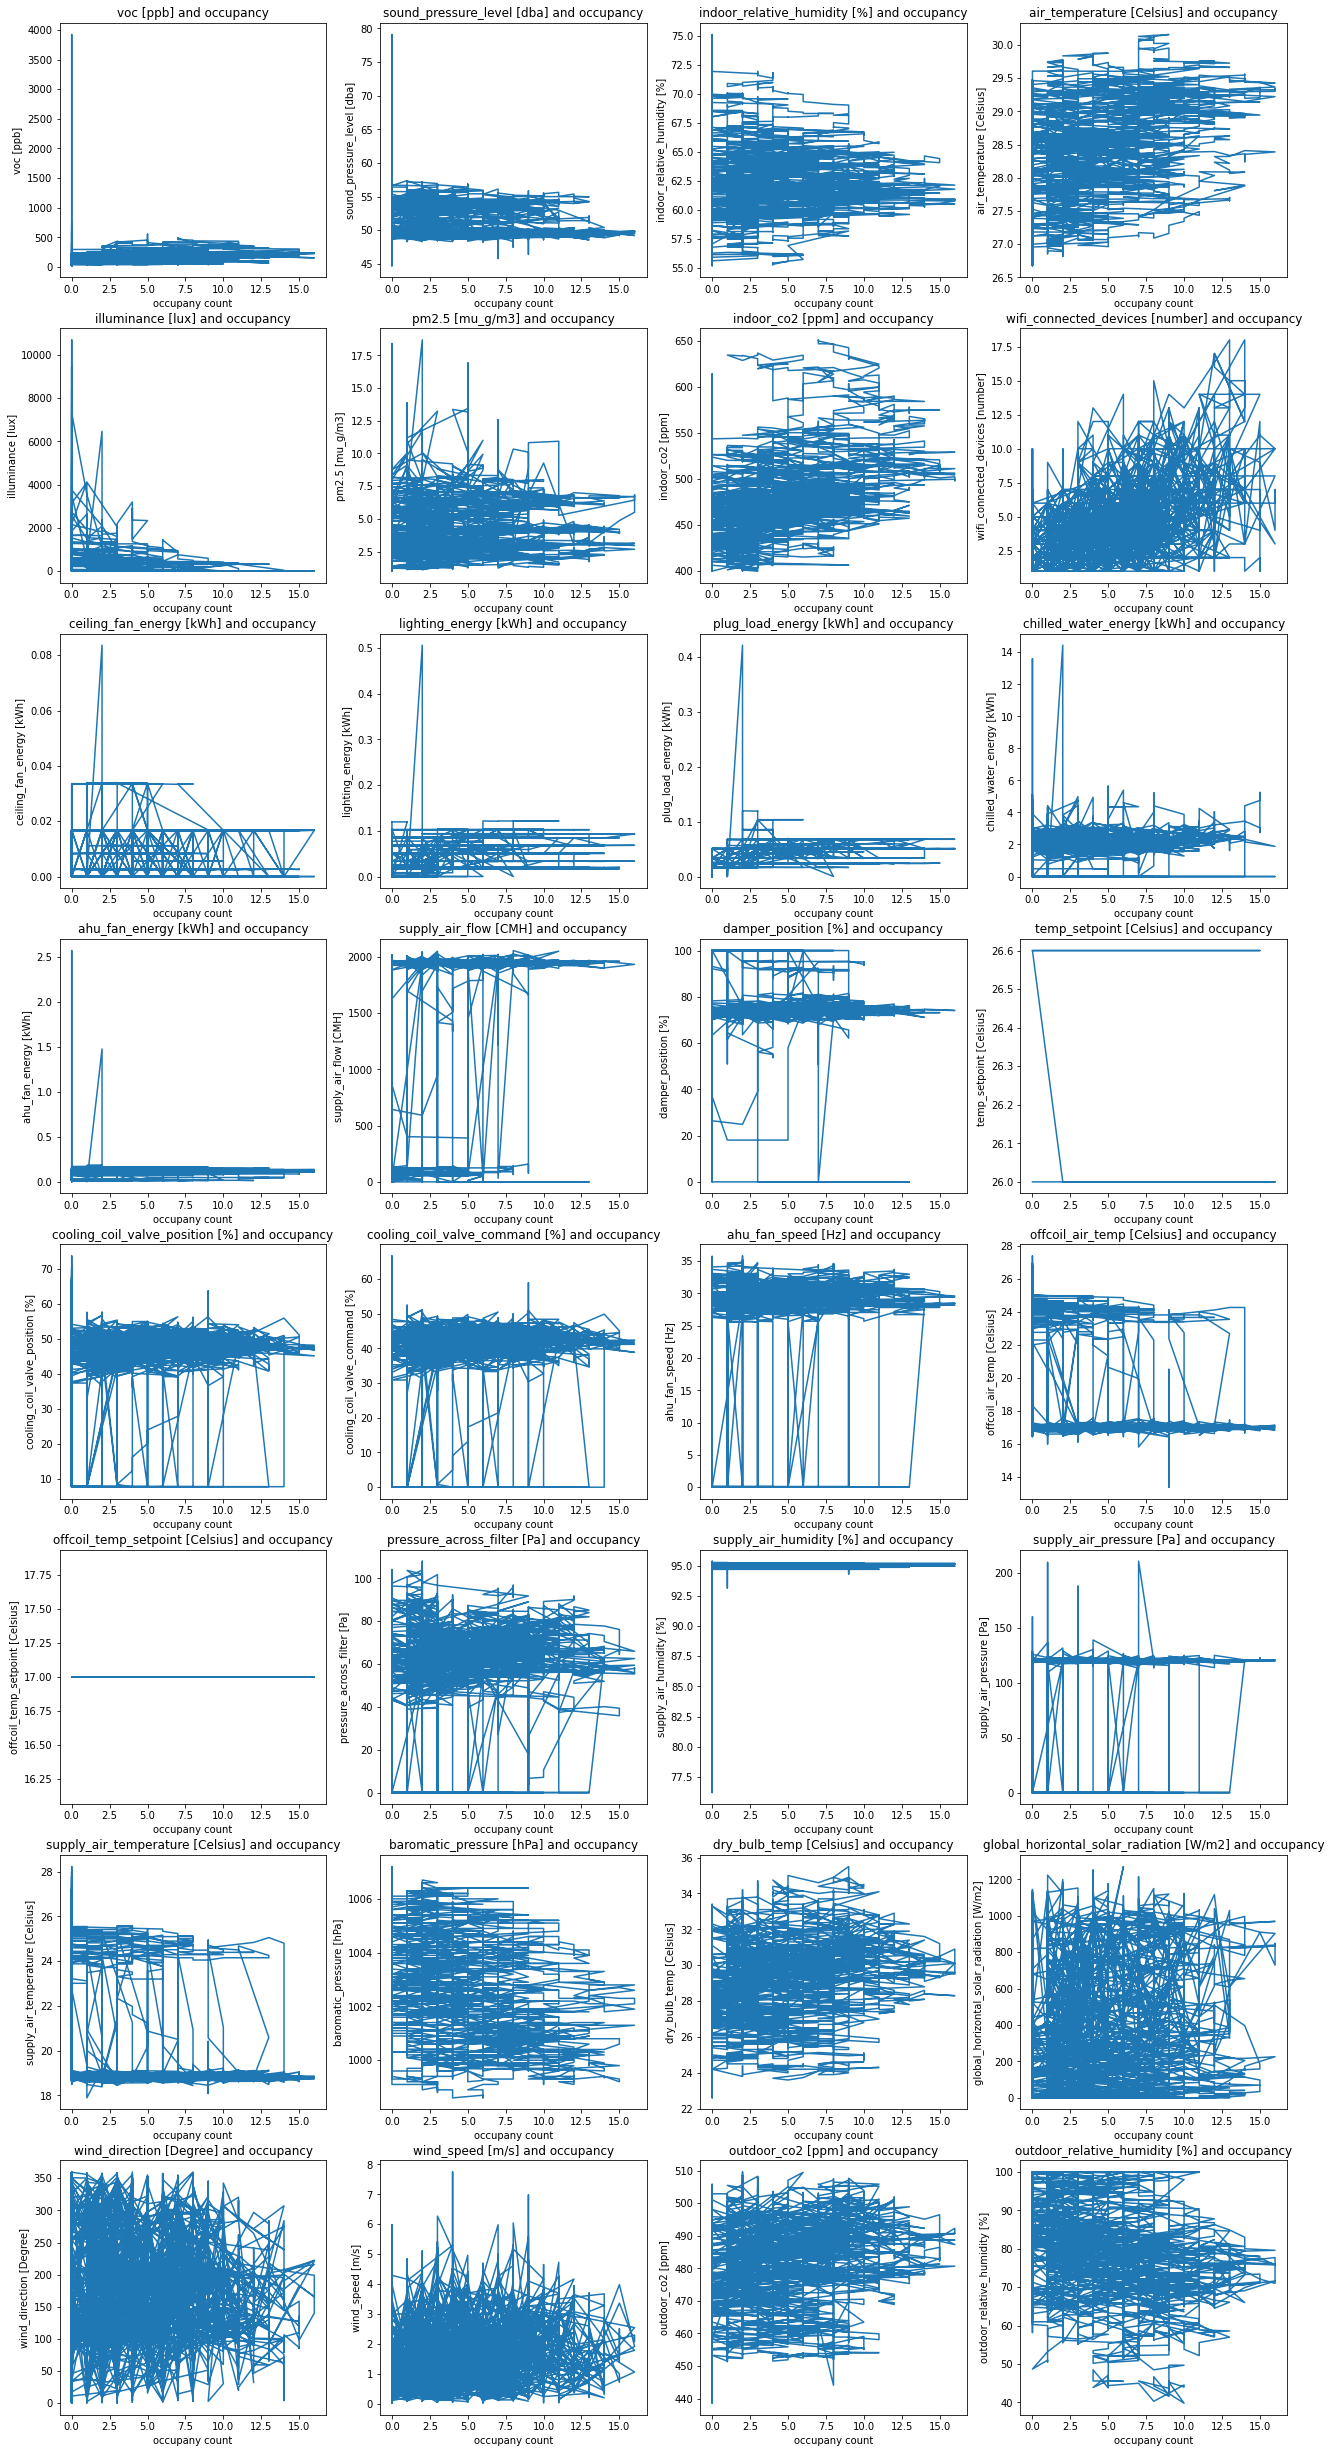

In [60]:
# Visually inspect all variables against target variable (occupant count)

index = 1
variables = list(df.columns[1:-5])
x = df['occupant_count [number]']
plt.figure(figsize=(22,5.5*len(variables)//4))
for var in variables:
    plt.subplot(len(variables)//4, 4, index)
    y = df[var]
    plt.plot(x,y)
    plt.title(f"{var} and occupancy")
    plt.xlabel("occupany count")
    plt.ylabel(f"{var}")
    index += 1

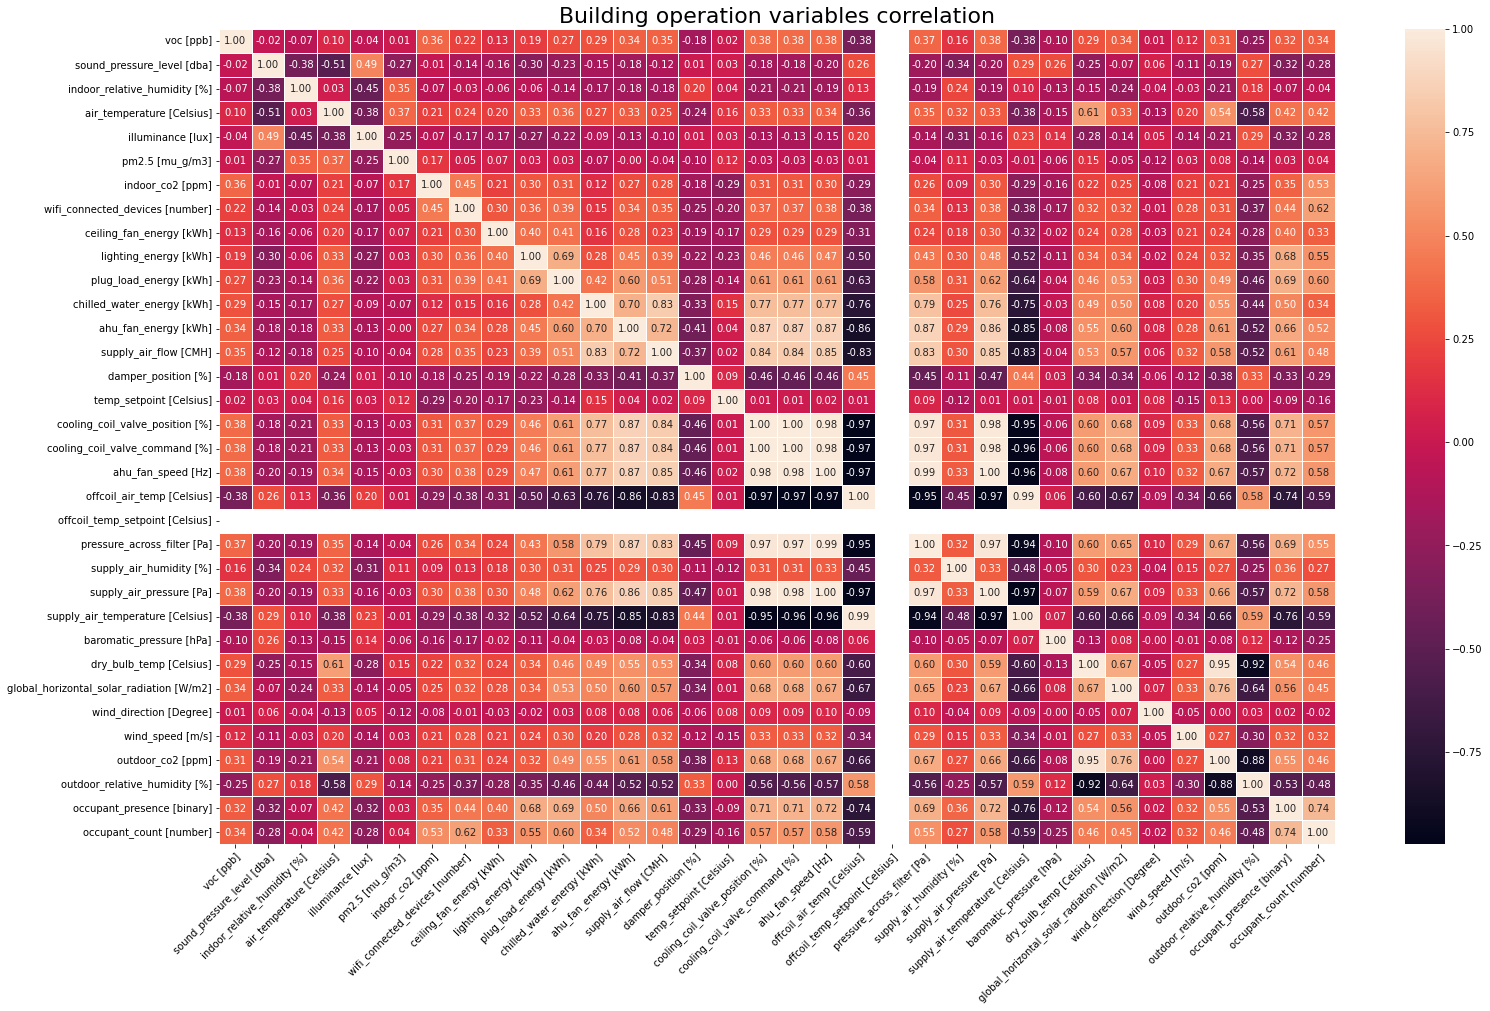

In [70]:
# Visualize variables on heat map

plt.figure(figsize=(25,15))
ax = sns.heatmap(df[list(df.columns[:-3])].corr(), annot=True, fmt='.2f', linewidths=0.5)
props = plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.title('Building operation variables correlation', size=22);

### Feature Engineering

In [12]:
# Extract more granular timestamp info (month, dayofmonth, hour)

months, days, hours = [], [], []

for timestamp in df['timestamp']:
    months.append(timestamp.month)
    days.append(timestamp.day)
    hours.append(timestamp.hour)

df['month'] = months
df['day'] = days 
df['hour'] = hours

In [13]:
# df.drop(columns=['timestamp'], inplace=True)

In [14]:
df.head()

,timestamp,voc [ppb],sound_pressure_level [dba],indoor_relative_humidity [%],air_temperature [Celsius],illuminance [lux],pm2.5 [mu_g/m3],indoor_co2 [ppm],wifi_connected_devices [number],ceiling_fan_energy [kWh],lighting_energy [kWh],plug_load_energy [kWh],chilled_water_energy [kWh],ahu_fan_energy [kWh],supply_air_flow [CMH],damper_position [%],temp_setpoint [Celsius],cooling_coil_valve_position [%],cooling_coil_valve_command [%],ahu_fan_speed [Hz],offcoil_air_temp [Celsius],offcoil_temp_setpoint [Celsius],pressure_across_filter [Pa],supply_air_humidity [%],supply_air_pressure [Pa],supply_air_temperature [Celsius],baromatic_pressure [hPa],dry_bulb_temp [Celsius],global_horizontal_solar_radiation [W/m2],wind_direction [Degree],wind_speed [m/s],outdoor_co2 [ppm],outdoor_relative_humidity [%],occupant_presence [binary],occupant_count [number],month,day,hour
0,2021-09-07 00:00:00+08:00,140.766663,51.503334,67.773331,28.109333,211.166672,7.966667,495.299988,3,0.0,0.0,0.000000,0.0,0.00000,1942.828,72.98235,26.0,7.738285,0.0,0.0,24.099337,17,0.0,94.844788,0.0,25.374554,1005.198364,26.101631,0.0,108.092972,0.190000,463.093536,97.704887,0,0,9,7,0
1,2021-09-07 00:05:00+08:00,130.500000,50.571430,67.121788,28.097857,230.500000,7.500000,491.964294,1,0.0,0.0,0.016602,0.0,0.01757,1942.828,72.98235,26.0,7.738285,0.0,0.0,24.099337,17,0.0,94.844788,0.0,25.374554,1005.198425,26.101616,0.0,91.175331,0.152101,462.096314,97.404854,0,0,9,7,0
2,2021-09-07 00:10:00+08:00,59.133335,51.296665,65.439667,28.065001,240.330002,6.666667,479.866669,2,0.0,0.0,0.017090,0.0,0.01563,1942.828,72.98235,26.0,7.738285,0.0,0.0,24.099337,17,0.0,94.844788,0.0,25.374554,1005.200012,26.100000,0.0,88.300003,0.150000,463.476074,97.400002,0,0,9,7,0
3,2021-09-07 00:15:00+08:00,28.933332,50.883335,64.721001,27.944000,229.153336,5.933333,471.966675,2,0.0,0.0,0.016601,0.0,0.01758,1942.828,72.98235,26.0,7.738285,0.0,0.0,24.099337,17,0.0,94.844788,0.0,25.374554,1005.200012,26.100000,0.0,109.699997,0.150000,462.886261,97.298378,0,0,9,7,0
4,2021-09-07 00:20:00+08:00,20.799999,50.593334,64.278336,27.798000,224.029999,5.400000,461.466675,2,0.0,0.0,0.017090,0.0,0.01758,1942.828,72.98235,26.0,7.738285,0.0,0.0,24.099337,17,0.0,94.844788,0.0,25.374554,1005.003235,26.101622,0.0,211.600006,0.150000,462.496155,97.403244,0,0,9,7,0


In [15]:
# Functions to cyclically encode time info with sine/cosine transformation

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

In [16]:
# Apply sine/cosine transformations

df2 = df[['timestamp', 'month', 'day', 'hour']].copy()

df2['month_sin'] = sin_transformer(4).fit_transform(df2[['month']])['month']
df2['month_cos'] = cos_transformer(4).fit_transform(df2[['month']])['month']

df2['day_sin'] = sin_transformer(30).fit_transform(df2[['day']])['day']
df2['day_cos'] = cos_transformer(30).fit_transform(df2[['day']])['day']

df2['hour_sin'] = sin_transformer(24).fit_transform(df2[['hour']])['hour']
df2['hour_cos'] = cos_transformer(24).fit_transform(df2[['hour']])['hour']

In [17]:
df2.head()

,timestamp,month,day,hour,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos
0,2021-09-07 00:00:00+08:00,9,7,0,1.0,5.510911e-16,0.994522,0.104528,0.0,1.0
1,2021-09-07 00:05:00+08:00,9,7,0,1.0,5.510911e-16,0.994522,0.104528,0.0,1.0
2,2021-09-07 00:10:00+08:00,9,7,0,1.0,5.510911e-16,0.994522,0.104528,0.0,1.0
3,2021-09-07 00:15:00+08:00,9,7,0,1.0,5.510911e-16,0.994522,0.104528,0.0,1.0
4,2021-09-07 00:20:00+08:00,9,7,0,1.0,5.510911e-16,0.994522,0.104528,0.0,1.0


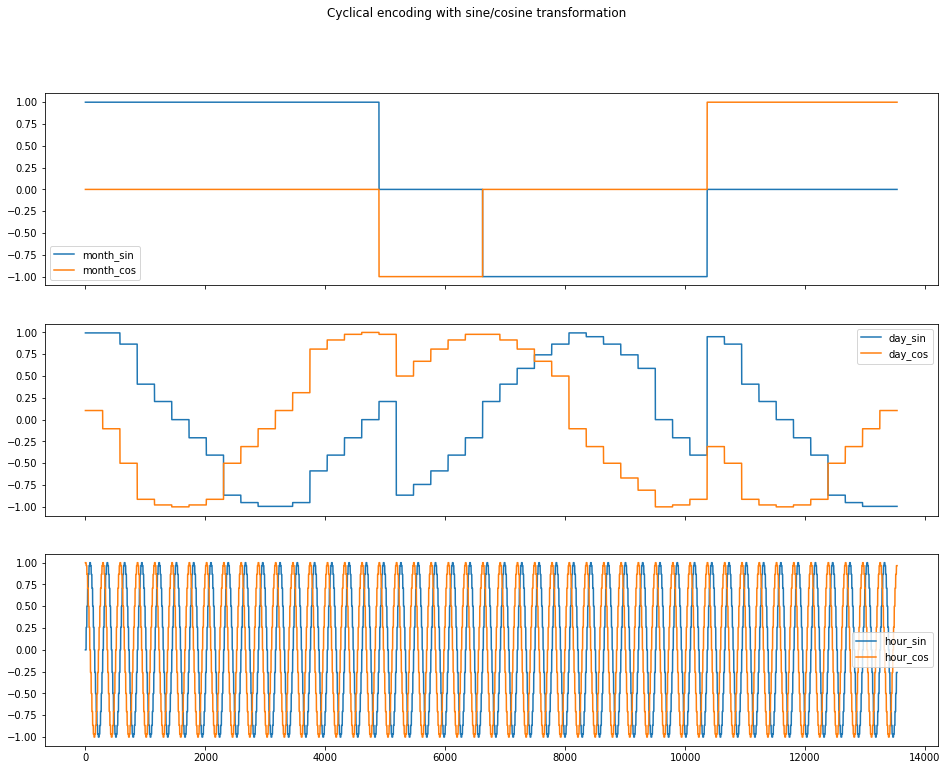

In [19]:
# Plot transformed timestamp info

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(16,12))
df2[['month_sin', 'month_cos']].plot(ax=ax[0])
df2[['day_sin', 'day_cos']].plot(ax=ax[1])
df2[['hour_sin', 'hour_cos']].plot(ax=ax[2])
plt.suptitle("Cyclical encoding with sine/cosine transformation");

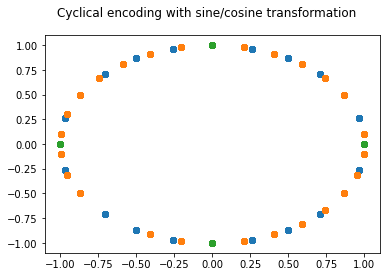

In [20]:
# Observe all unique transformed values to see actual-value capture

fig2, ax = plt.subplots(1, 1, sharex=True, sharey=True)
plt.scatter(data=df2, x='hour_sin', y='hour_cos')
plt.scatter(data=df2, x='day_sin', y='day_cos')
plt.scatter(data=df2, x='month_sin', y='month_cos')
plt.suptitle("Cyclical encoding with sine/cosine transformation");